<a href="https://colab.research.google.com/github/CodingDuckmx/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jesus_CaballeroMedrano_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def meanvalue(rlist):
   nlist = np.array(rlist)
   return sum(nlist) / len(nlist)

def variance(rlist):
  nlist = np.array(rlist)
  m = meanvalue(rlist)
  return (np.dot((nlist - m),(nlist-m) )/ (len(rlist)-1))

def stddeviation(rlist):
  return (variance(rlist))**.5



In [0]:
sales = [3505,2400,3027,2798,3700,3250,2689]


print('Calculeted by own functions:')
print('The mean of the sample is:', meanvalue(sales),'.')
print('The variance of the sample is:', variance(sales),'.')
print('The standard deviation of the sample is:', stddeviation(sales),'.')
print(' ')

print('Calculated with libraries:')

print('The mean of the sample is:', np.mean(sales),'.')
print('The variance of the sample is:', np.var(sales, ddof=1),'.')
print('The standard deviation of the sample is:', np.std(sales, ddof=1),'.')


Calculeted by own functions:
The mean of the sample is: 3052.714285714286 .
The variance of the sample is: 214387.90476190473 .
The standard deviation of the sample is: 463.0204150595357 .
 
Calculated with libraries:
The mean of the sample is: 3052.714285714286 .
The variance of the sample is: 214387.90476190473 .
The standard deviation of the sample is: 463.0204150595357 .


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
num_cust = [127,80,105,92,120,115,93]

cov = np.cov(np.array(sales),np.array(num_cust), ddof=1)

cov

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
print( stddeviation(num_cust) )

r = cov /(stddeviation(num_cust) * stddeviation(sales))

print('The correlation coefficient is:')
print(r) 

np.corrcoef(sales,num_cust, ddof=1)

# cov / 2 

17.057326313123664
The correlation coefficient is:
[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: bias and ddof have no effect and are deprecated
  


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
wlink = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(wlink, index_col=0)


df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#I'm choosing just these features because these make sense for me, calculating mean, std and variance. 


df_num = df[['age','fare']]

df_num = df_num[df_num['fare'].isnull()== False]
df_num.isnull().sum()
df_num.head()

,age,fare
1,29.0000,211.3375
2,0.9167,151.5500
3,2.0000,151.5500
4,30.0000,151.5500
5,25.0000,151.5500


In [0]:
print(np.cov(df_num['age'],df_num['fare']))

print(np.var(df_num['age'], ddof=1))
print(np.var(df_num['fare'], ddof=1))

[[ 165.38595695  114.41661308]
 [ 114.41661308 2678.95973789]]
165.3859569498135
2678.9597378928934


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

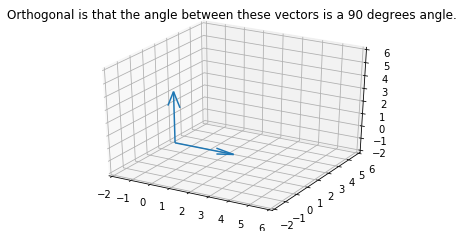

In [0]:
vectors = np.array([[0, 0, 0, 3, 0, 0], 
                    [0, 0, 0, 0, 0, 4]])

X, Y, Z, U, V, W = zip(*vectors)

fig =plt.figure()

ax =fig.add_subplot(111,projection='3d')

ax.quiver(X,Y,Z,U,V,W,length=1)

ax.set_xlim([-2,6])
ax.set_ylim([-2,6])
ax.set_zlim([-2,6])

ax.set_title('Orthogonal is that the angle between these vectors is a 90 degrees angle.')

plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
print('The vectors are not orthogonal as the dot product is not zero, it is:', np.dot(a,b))

The vectors are not orthogonal as the dot product is not zero, it is: -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

print('The ||c||^2 is:', np.linalg.norm(c)**2,'.')
print('The c * c is:', np.dot(c,c),'.')
print('The cT * c is:', np.dot(c.T,c),'.')
print('')

print('The three of them are equivalent forms for the squared norm.')

The ||c||^2 is: 665.0 .
The c * c is: 665 .
The cT * c is: 665 .

The three of them are equivalent forms for the squared norm.


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{array}
$d = 7 * (1,0) + 12 * (0,1)$
\end{array}
\begin{array}
$e = 2 * (1,0,0) + 11 * (0,1,0)+ (-8) * (0,0,1)$
\end{array}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])

f_norm = (1 / np.linalg.norm(f)) * f

print('The normalized vector is:', f_norm)
print('The norm is:', round(np.linalg.norm(f_norm),5) )

The normalized vector is: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
The norm is: 1.0


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Text(0.5, 0.92, 'The green are the independent vectors, and the red and blue are the dependent vectors.')

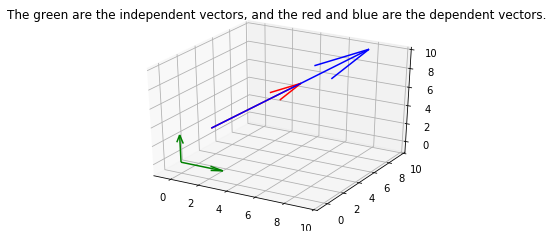

In [0]:
vectors2 = np.array([[1,2,3,4,4,4]])
vectors2_1 = np.array([[1,2,3,7,7,7]])

vectors3 = np.array([[0,0,0,3,0,0],
                     [0,0,0,0,0,3]])

X1,Y1,Z1,U1,V1,W1 = zip(*vectors2)
X21,Y21,Z21,U21,V21,W21 = zip(*vectors2_1)
X2,Y2,Z2,U2,V2,W2 = zip(*vectors3)

fig = plt.figure()

ax=fig.add_subplot(1,1,1,projection='3d')

ax.quiver(X1,Y1,Z1,U1,V1,W1,length=1, colors='red')
ax.quiver(X2,Y2,Z2,U2,V2,W2,length=1, colors='green')
ax.quiver(X21,Y21,Z21,U21,V21,W21,length=1, colors='blue')
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])
ax.set_zlim([-1,10])

ax.set_title('The green are the independent vectors, and the red and blue are the dependent vectors.')

In [0]:
vectors = np.array([[0, 0, 0, 3, 0, 0], 
                    [0, 0, 0, 0, 0, 4]])

X, Y, Z, U, V, W = zip(*vectors)

fig =plt.figure()

ax =fig.add_subplot(111,projection='3d')

ax.quiver(X,Y,Z,U,V,W,length=1)

ax.set_xlim([-2,6])
ax.set_ylim([-2,6])
ax.set_zlim([-2,6])

ax.set_title('Orthogonal is that the angle between these vectors is a 90 degrees angle.')

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

dotprod = np.dot(g,h)

print('As the dot product is not zero, it actually is', dotprod, ', the span is just a line, with directional vector g.')

As the dot product is not zero, it actually is 20 , the span is just a line, with directional vector g.


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
a = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])
b = np.array([0,0,0])

np.linalg.solve(a,b)

print('As none of them are lineal combination of the other two, the three are l.i., therefore the span is R^3.')


As none of them are lineal combination of the other two, the three are l.i., therefore the span is R^3.


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



<function matplotlib.pyplot.show>

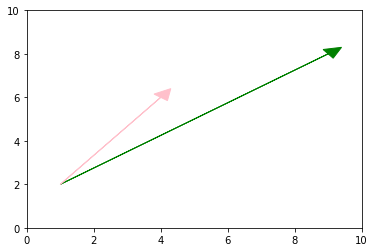

In [0]:
plt.arrow(1,2,8,6, head_width=0.5, head_length=0.5, color='green')

plt.arrow(1,2,3,4, head_width=0.5, head_length=0.5, color='pink')

plt.xlim([0,10])
plt.ylim([0,10])

plt.show

## 6.2 What does it mean to form a basis?

A set of l. i. vectors that spans all R^2.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3],
          [-1,0,7],
         [4,8,2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

How many lineal independen rows or columns (eitherwise) are in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

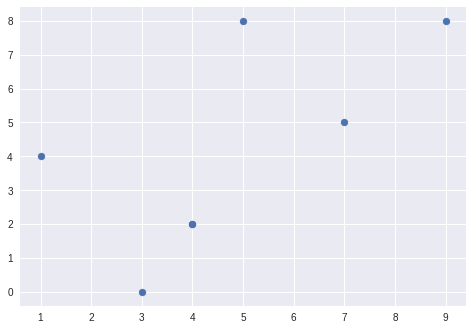

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()